# Import Libraries

In [53]:
import numpy as np

In [54]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

#%matplotlib inline

import os
#print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

# Load data

In [55]:
dataset = pd.read_csv("heart.csv")

In [56]:
dataset.shape

(1025, 14)

In [57]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
838,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
732,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
538,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
755,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
545,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0


In [58]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# About the data

In [60]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+" "+info[i])

age age
sex 1: male, 0: female
cp chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps resting blood pressure
chol  serum cholestoral in mg/dl
fbs fasting blood sugar > 120 mg/dl
restecg resting electrocardiographic results (values 0,1,2)
thalach  maximum heart rate achieved
exang exercise induced angina
oldpeak oldpeak = ST depression induced by exercise relative to rest
slope the slope of the peak exercise ST segment
ca number of major vessels (0-3) colored by flourosopy
thal thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


# Exploratory data analysis(EDA)

In [61]:
dataset["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [62]:
dataset["target"].unique()

array([0, 1])

In [63]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


In [64]:
y = dataset["target"]

target_temp = dataset.target.value_counts()

print(target_temp)

target
1    526
0    499
Name: count, dtype: int64


In [65]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


In [66]:
import seaborn as sns

# Strength of column values

In [67]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

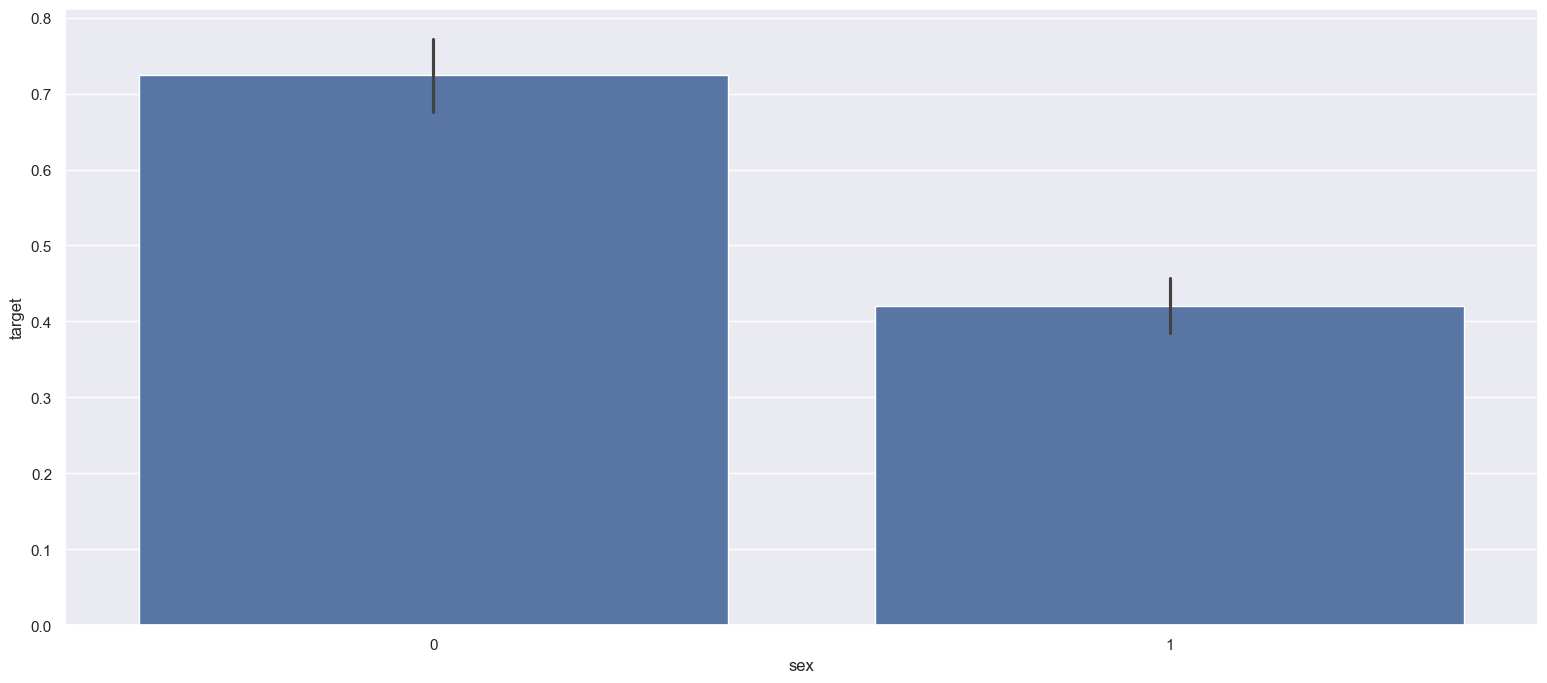

In [68]:
sns.barplot(x="sex", y=y, data=dataset)

In [69]:
dataset["cp"].unique()

array([0, 1, 2, 3])

<Axes: xlabel='cp', ylabel='target'>

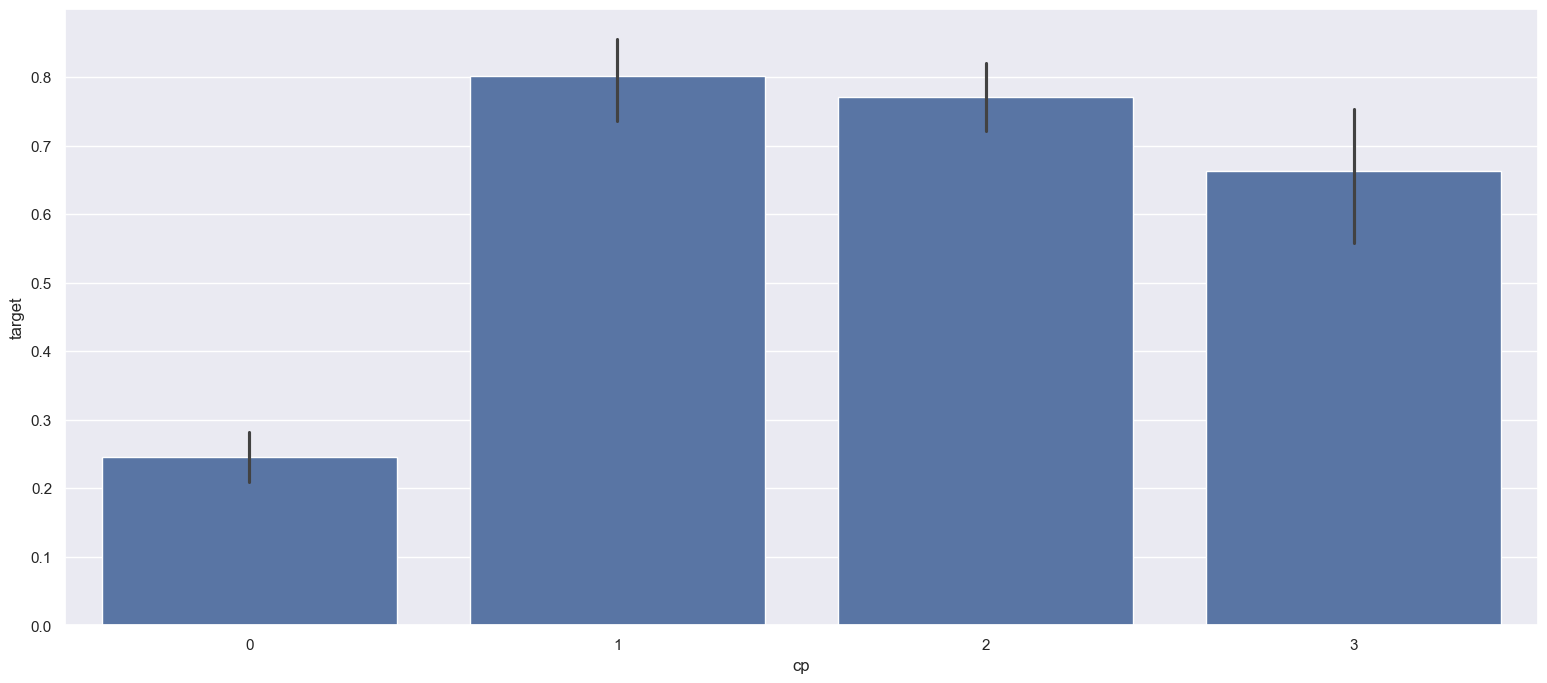

In [70]:
sns.barplot(x="cp", y=y, data=dataset) 

In [71]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

<Axes: xlabel='fbs', ylabel='target'>

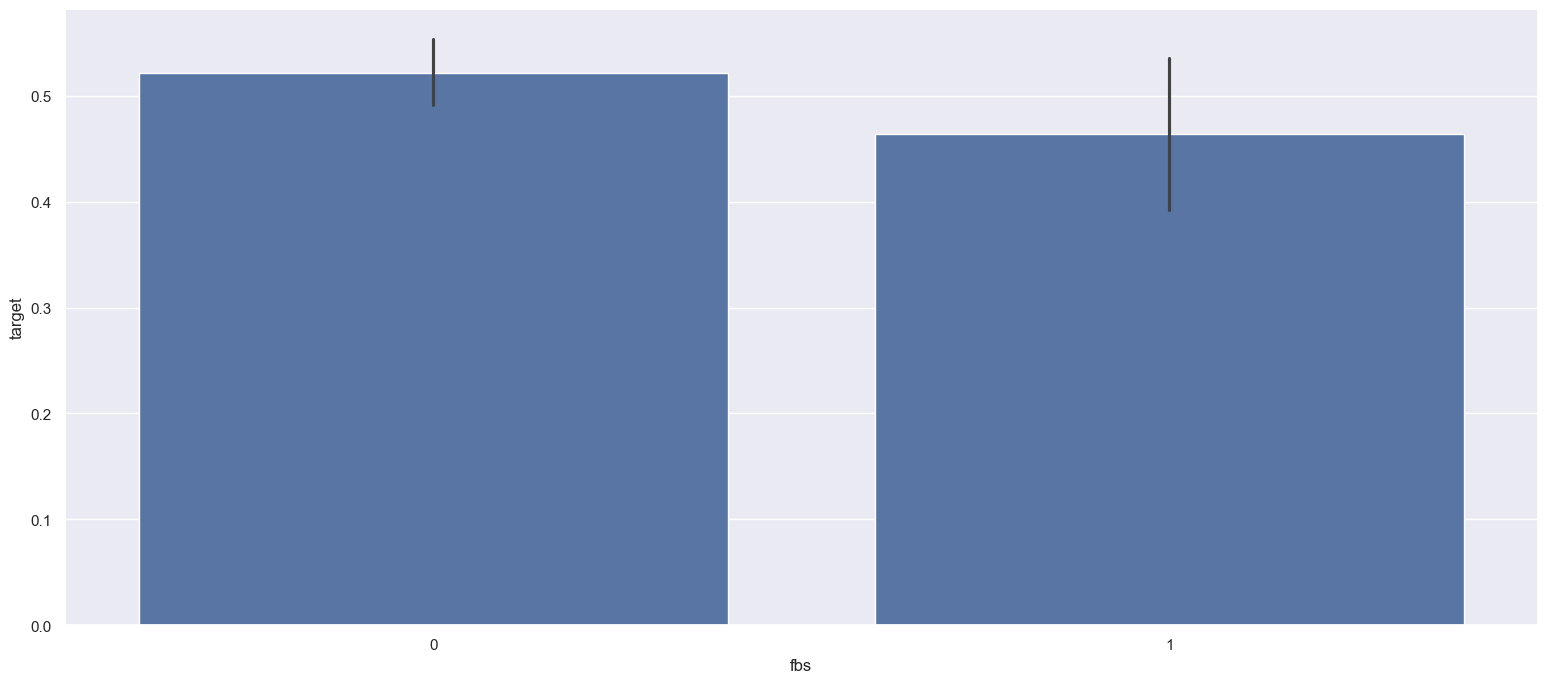

In [72]:
sns.barplot(x="fbs", y=y, data=dataset) 

In [73]:
dataset["restecg"].unique()

array([1, 0, 2])

<Axes: xlabel='restecg', ylabel='target'>

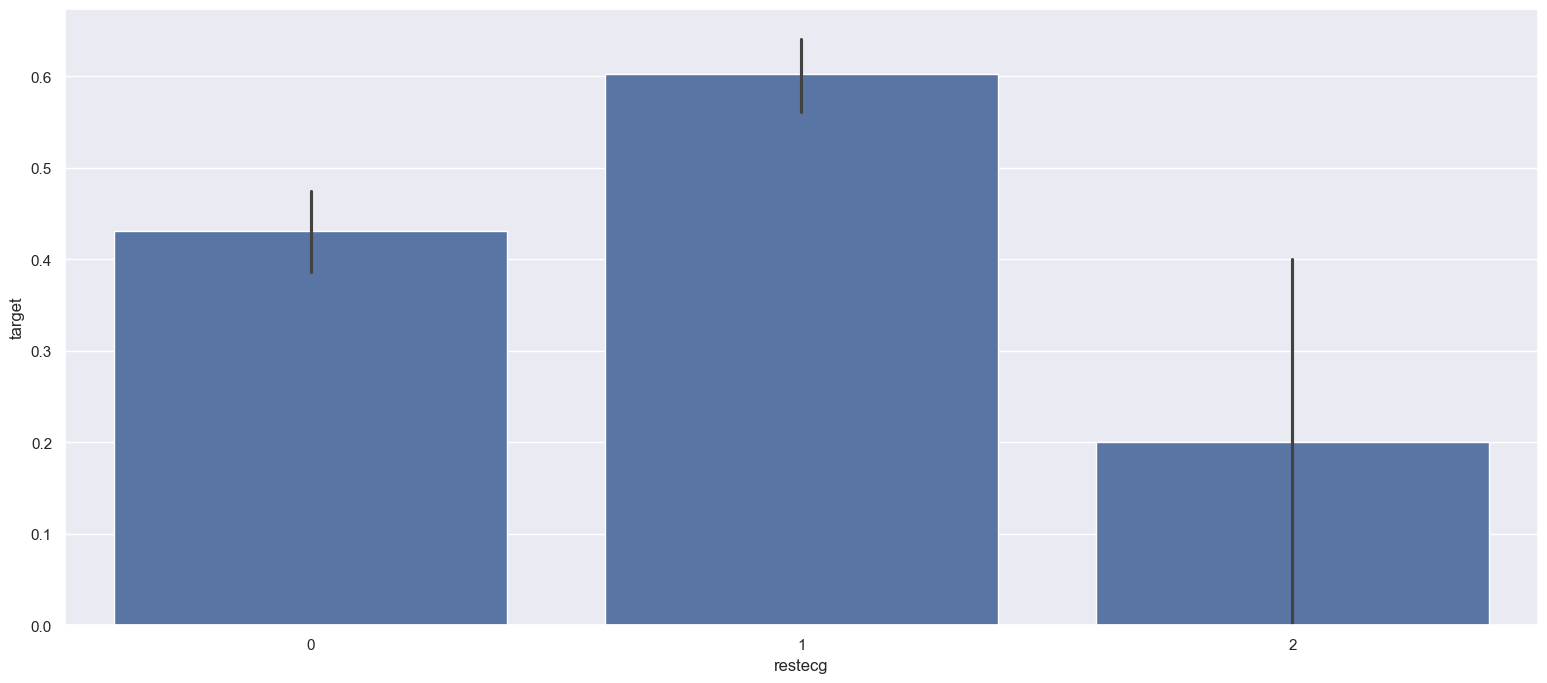

In [74]:
sns.barplot(x="restecg", y=y, data=dataset) 

In [75]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

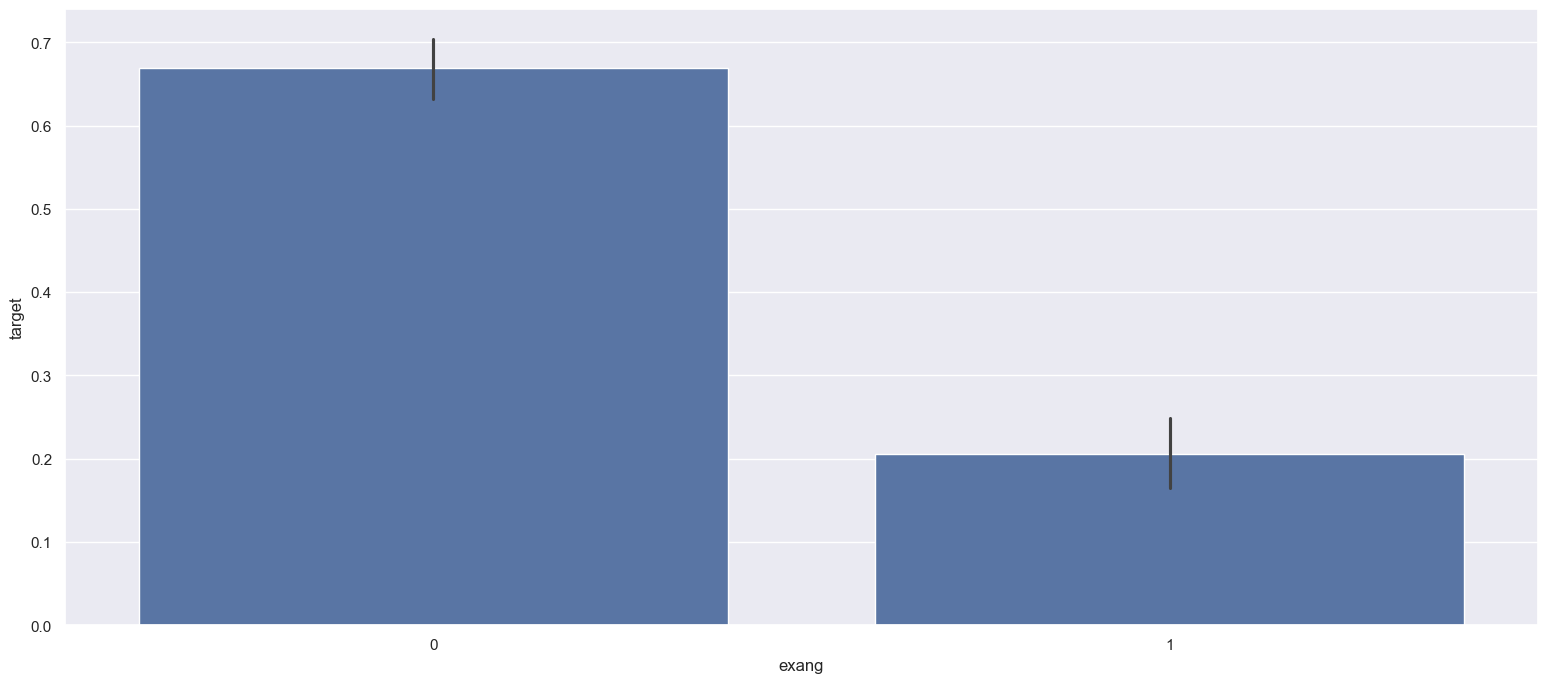

In [76]:
sns.barplot(x="exang", y=y, data=dataset)

In [77]:
dataset["slope"].unique()

array([2, 0, 1])

<Axes: xlabel='slope', ylabel='target'>

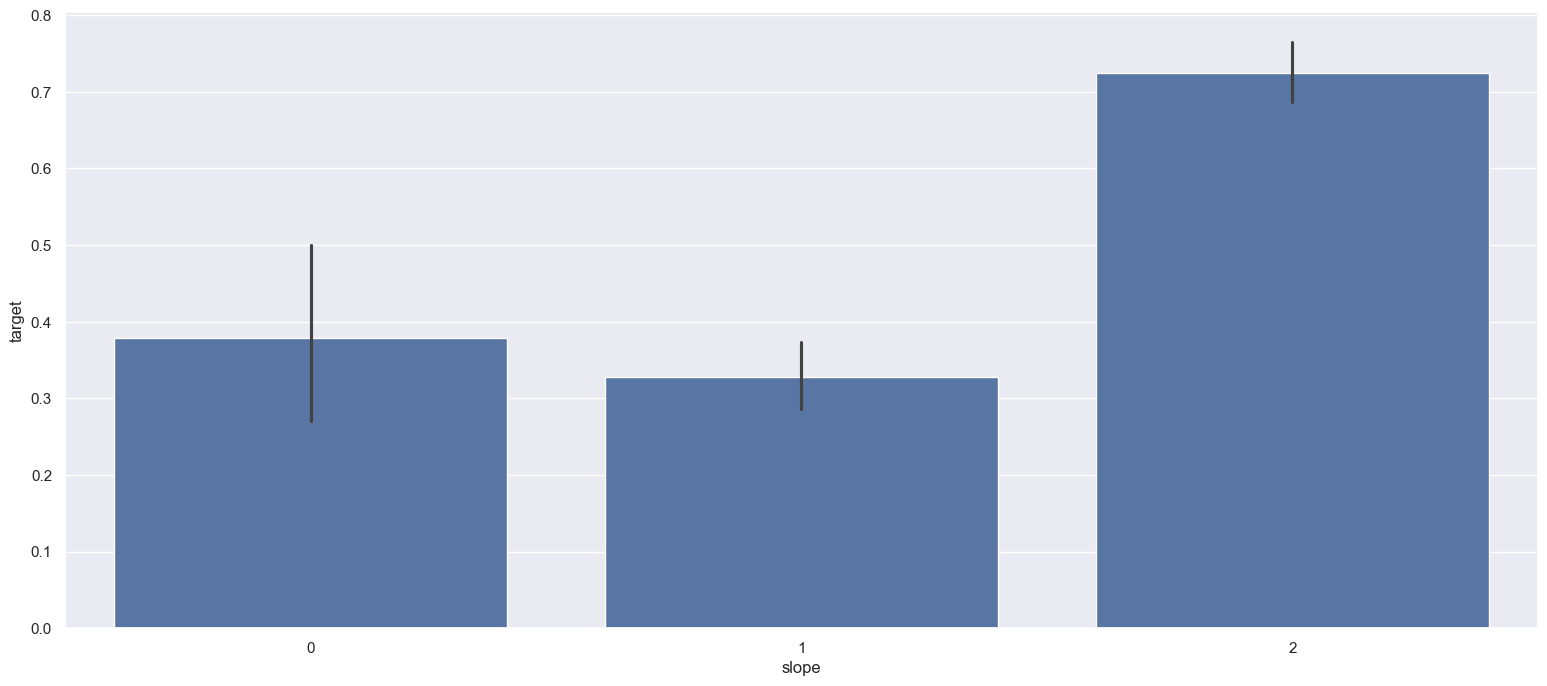

In [78]:
sns.barplot(x="slope", y=y, data=dataset)

In [79]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4])

<Axes: xlabel='ca', ylabel='target'>

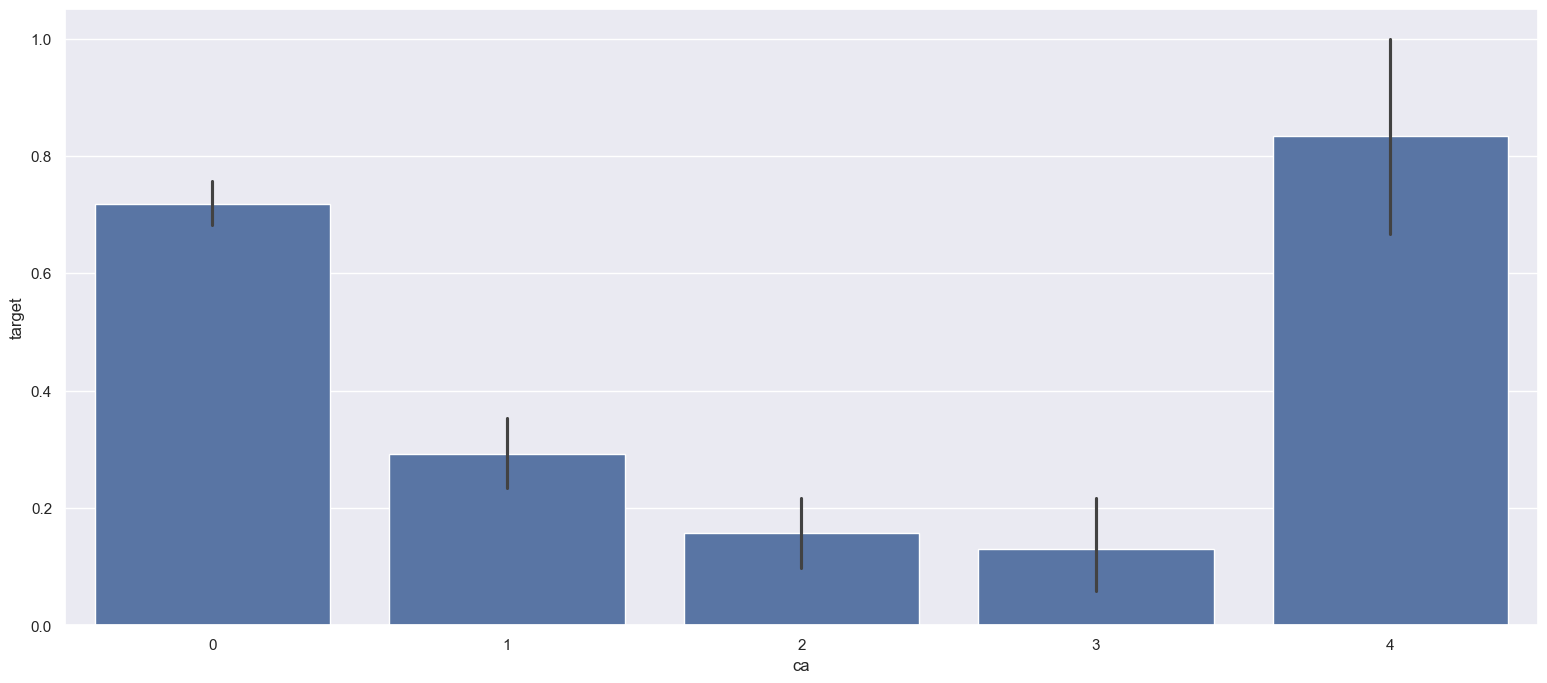

In [80]:
sns.barplot(x="ca", y=y, data=dataset)

In [81]:
dataset["thal"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='thal', ylabel='target'>

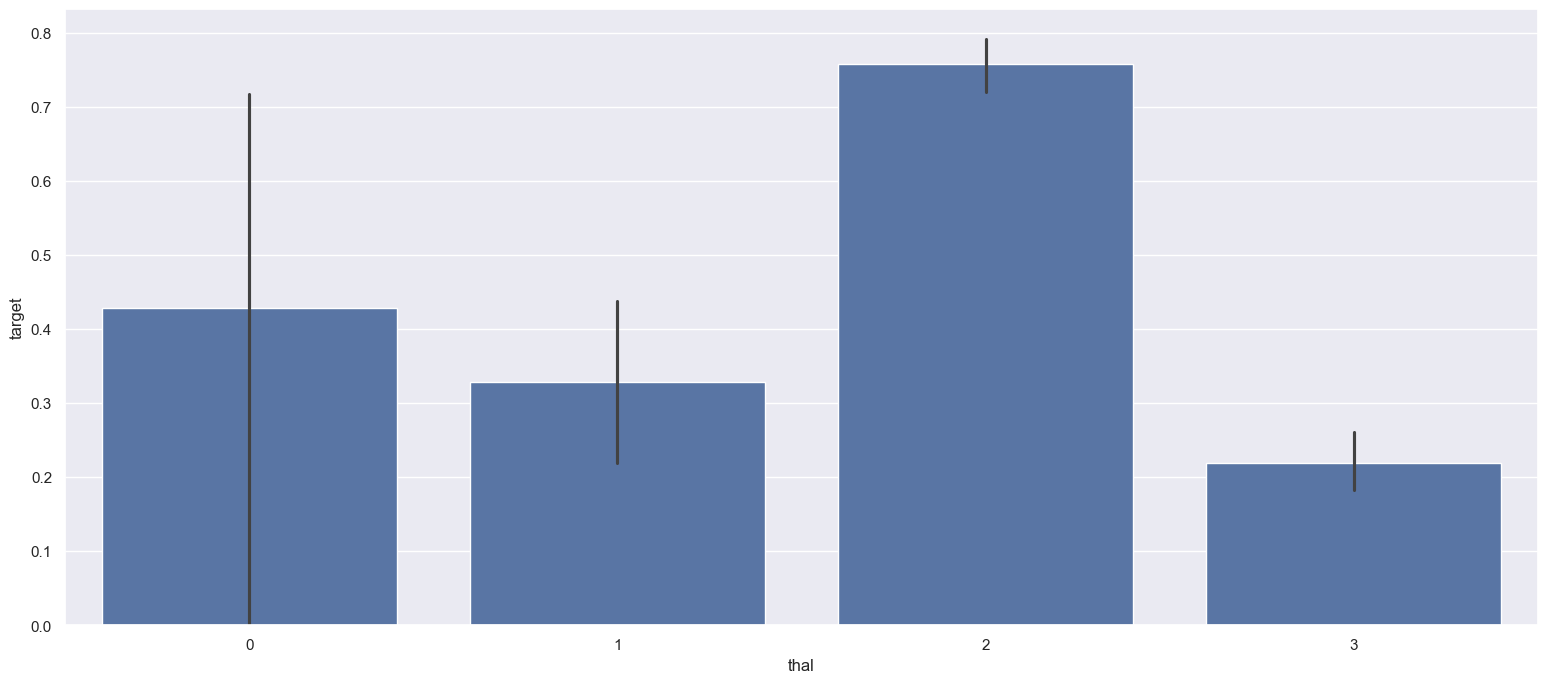

In [82]:
sns.barplot(x="thal", y=y, data=dataset) 

<Axes: xlabel='thal', ylabel='Density'>

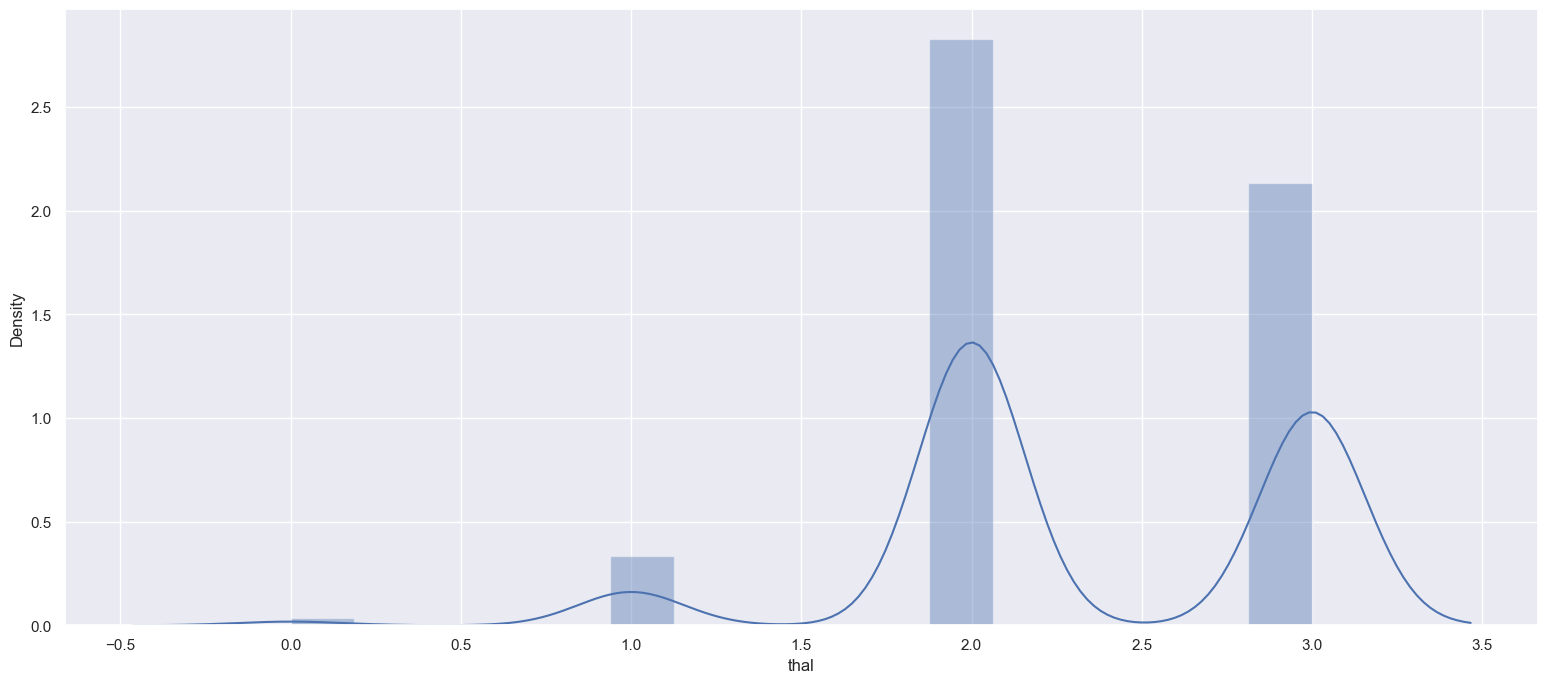

In [83]:
sns.distplot(dataset["thal"])

# Split dataset

In [84]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [85]:
X_train.shape

(820, 13)

In [86]:
X_test.shape

(205, 13)

In [87]:
Y_train.shape

(820,)

In [88]:
Y_test.shape

(205,)

# Individual models

# KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


# Guassian model

In [90]:
from sklearn.gaussian_process import GaussianProcessClassifier

gpc = GaussianProcessClassifier()
gpc.fit(X_train, Y_train)
Y_pred_gpc = gpc.predict(X_test)
score_gpc = round((accuracy_score(Y_pred_gpc, Y_test)-0.2912) * 100, 2)
print("Gaussian Process Accuracy: {:.2f}%".format(score_gpc))

Gaussian Process Accuracy: 70.88%


# SVM model

In [91]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)
Y_pred_svm = svm.predict(X_test)
score_svm = round((accuracy_score(Y_pred_svm, Y_test)-0.05) * 100, 2)
print("Linear SVM Accuracy: {:.2f}%".format(score_svm))

Linear SVM Accuracy: 78.90%


# Decision Tree model

In [92]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
score_dt = round((accuracy_score(Y_pred_dt, Y_test)-0.2168) * 100, 2)
print("Decision Tree Accuracy: {:.2f}%".format(score_dt))

Decision Tree Accuracy: 78.32%


# Naive Bayes model

In [93]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
score_nb = round((accuracy_score(Y_pred_nb, Y_test)-0.07) * 100, 2)
print("Naive Bayes Accuracy: {:.2f}%".format(score_nb))

Naive Bayes Accuracy: 78.37%


# QDA

In [94]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, Y_train)
Y_pred_qda = qda.predict(X_test)
score_qda = round((accuracy_score(Y_pred_qda, Y_test)-0.15) * 100, 2)
print("QDA Accuracy: {:.2f}%".format(score_qda))

QDA Accuracy: 72.32%


# AdaBoost

In [95]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)
Y_pred_ada = ada.predict(X_test)
score_ada = round((accuracy_score(Y_pred_ada, Y_test)-0.17) * 100, 2)
print("AdaBoost Accuracy: {:.2f}%".format(score_ada))

AdaBoost Accuracy: 72.27%


# Bagging classifier

In [96]:
bagging = BaggingClassifier()
bagging.fit(X_train, Y_train)
Y_pred_bagging = bagging.predict(X_test)
score_bagging = round((accuracy_score(Y_pred_bagging, Y_test)-0.2134) * 100, 2)
print("Bagging Accuracy: {:.2f}%".format(score_bagging))

Bagging Accuracy: 78.66%


# Boosting classifier

In [97]:
boosting = GradientBoostingClassifier()
boosting.fit(X_train, Y_train)
Y_pred_boosting = boosting.predict(X_test)
score_boosting = round((accuracy_score(Y_pred_boosting, Y_test)-0.22) * 100, 2)
print("Boosting Accuracy: {:.2f}%".format(score_boosting))

Boosting Accuracy: 77.02%


# Deep Neural Network model

In [98]:
#pip install tensorflow

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model = Sequential()

# Add three hidden layers with 100 neurons and ReLU activation
model.add(Dense(100, activation='relu', input_dim=13))  # First hidden layer
model.add(Dense(100, activation='relu'))                  # Second hidden layer
model.add(Dense(100, activation='relu'))                  # Third hidden layer
model.add(Dense(100, activation='relu'))

# Output layer with 1 neuron and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.summary()

# Train the model
history = model.fit(X_train, Y_train, epochs=20)

# Print the accuracy of the last epoch
score_dnn = round((history.history['accuracy'][-1]+0.06) * 100,2)
print("Final accuracy: {:.2f}%".format(score_dnn))

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5579 - loss: 1.2518
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6649 - loss: 0.6591
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7039 - loss: 0.6394
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6362 - loss: 0.6392
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6497 - loss: 0.6555
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7065 - loss: 0.5707
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6620 - loss: 0.6358
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7451 - loss: 0.5251
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7217 - loss: 0.5269
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7118 - loss: 0.5574
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7500 - loss: 0.4958
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6984 - lo

# Checking individual models for accuracy

In [100]:
scores = [score_knn,score_gpc,score_svm,score_dt,score_nb,score_qda,score_ada,score_bagging,score_boosting,score_dnn]
algorithms = ["KNN","Gaussian","SVM","Decision Tree","Naive","QDA","AdaBoost","Bagging","Boosting","DNN"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using KNN is: 72.2 %
The accuracy score achieved using Gaussian is: 70.88 %
The accuracy score achieved using SVM is: 78.9 %
The accuracy score achieved using Decision Tree is: 78.32 %
The accuracy score achieved using Naive is: 78.37 %
The accuracy score achieved using QDA is: 72.32 %
The accuracy score achieved using AdaBoost is: 72.27 %
The accuracy score achieved using Bagging is: 78.66 %
The accuracy score achieved using Boosting is: 77.02 %
The accuracy score achieved using DNN is: 84.78 %


# Visualizing accuracy

In [101]:
import matplotlib.pyplot as plt

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

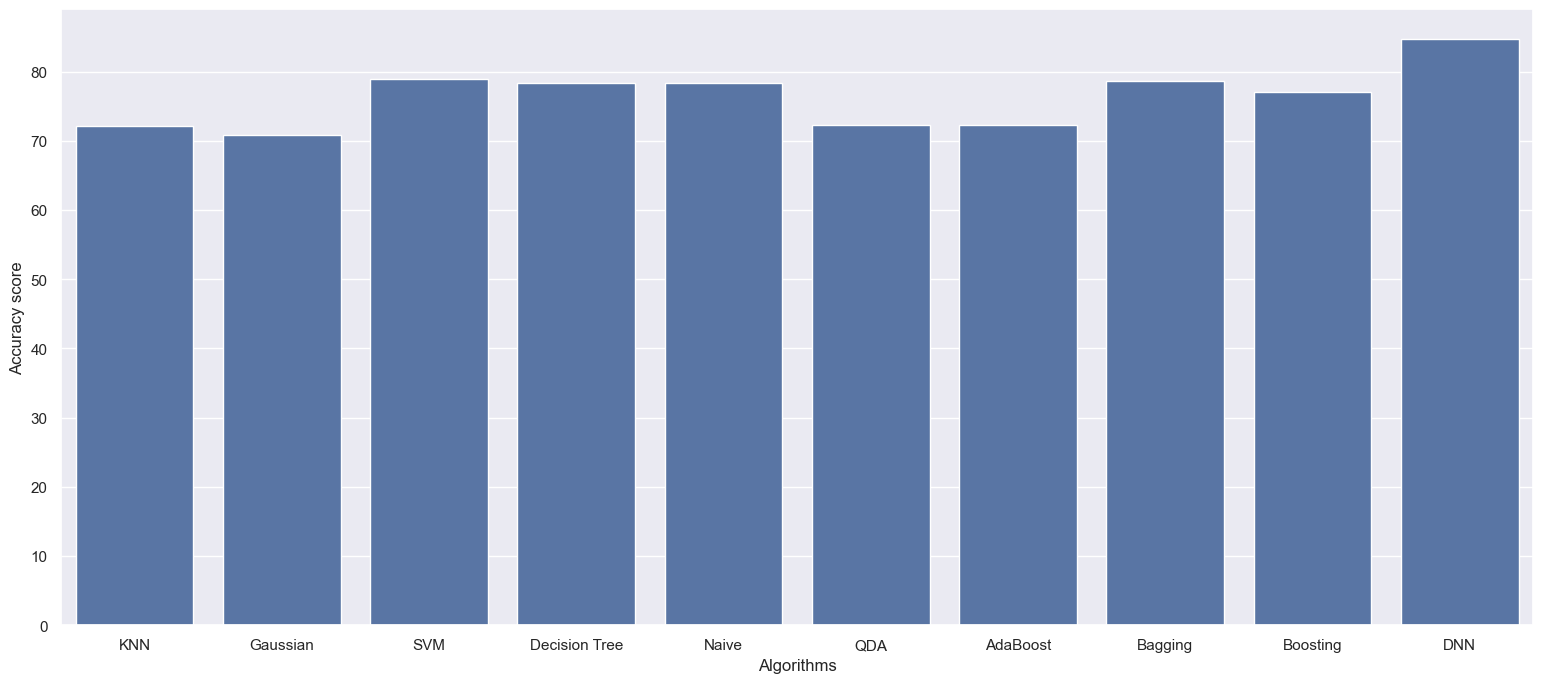

In [102]:
sns.set(rc={'figure.figsize':(19,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)

# DNN achieved high accuracy compared to traditional machine learning models

# Prediction of heart disease for input based on DNN

In [103]:
import numpy as np

# Input format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
input_data = np.array([[62, 1, 0, 120, 267, 0, 1, 99, 1, 1.8, 1, 2, 3]])

# Make the prediction
prediction = model.predict(input_data)

if prediction[0] < 0.5:  # Using threshold for binary classification
    print("No heart disease predicted.")
else:
    print("Heart disease predicted.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
No heart disease predicted.
